In [97]:
# 필요한 라이브러리를 설치합니다.
!pip install pandas numpy matplotlib scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.1 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.1 MB 2.1 MB/s eta 0:00:06
    --------------------------------------- 0.2/11.1 MB 2.5 MB/s eta 0:00:05
   - -------------------------------------- 0.4/11.1 MB 2.5 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/11.1 MB 3.2 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/11.1 MB 2.9 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/11.1 MB 2.9 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/11.1 MB 2.8 MB/s eta 0:00:04
   --- ------------------------------------ 1.1/11.1 MB 2.7 MB/s eta 0:00:04
   ---- ----------------------------------- 1.2/11.1 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.1 MB 2.7 MB/s eta 0:00:04
   ----- ---------------------------------- 1.4/11.1 MB 2.8 MB/s eta 0:00:04
   ---


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\zero_\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as MinMaxScaler

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

print("👽 Hello.")

👽 Hello.


# PreProcess

[참고 사이트](https://meissa.tistory.com/36)

## N1_데이터 불러오기

In [36]:
import os

csv_file_path = os.path.join(os.getcwd(), 'trade.csv') # csv 파일 경로 확인하기
trade = pd.read_csv(csv_file_path) 
print(trade) # trade 데이터 확인하기 # head()로 상위 5개 데이터 확인하기

            기간 국가명      수출건수        수출금액       수입건수        수입금액       무역수지  \
0    2015년 01월  중국  116932.0  12083947.0   334522.0   8143271.0  3940676.0   
1    2015년 01월  미국   65888.0   5561545.0   509564.0   3625062.0  1936484.0   
2    2015년 01월  일본   54017.0   2251307.0    82480.0   3827247.0 -1575940.0   
3    2015년 02월  중국   86228.0   9927642.0   209100.0   6980874.0  2946768.0   
4    2015년 02월  미국   60225.0   5021264.0   428678.0   2998216.0  2023048.0   
5    2015년 02월  일본   48652.0   2000724.0    83320.0   3837614.0 -1836890.0   
6    2015년 03월  중국  117529.0  11868032.0   234321.0   7226911.0  4641121.0   
7    2015년 03월  미국   75789.0   6795064.0   491428.0   4055574.0  2739490.0   
8    2015년 03월  일본   60018.0   2127216.0    98373.0   4383839.0 -2256623.0   
9    2015년 04월  중국  118916.0  11765637.0   274021.0   7648402.0  4117234.0   
10   2015년 04월  미국   76605.0   6204676.0   490644.0   3842049.0  2362628.0   
11   2015년 04월  일본   58362.0   2380419.0    94258.0   4276097.0 

## N2_결측치(Missing Data)

현실에서 우리가 다룰 데이터는 결측치를 포함하는 경우가 많다.

*결측치를 처리하는 두가지 방법*

1. 결측치가 있는 데이터를 제거한다.
2. 결측치를 어떤 값으로 대체한다.

---

### 코드 흐름 설명

1. **라이브러리 설치 및 임포트**
    - `pip install` 명령어를 통해 필요한 라이브러리(`pandas`, `numpy`, `matplotlib`)를 설치합니다.
    - 이후, `pandas`, `numpy`, `matplotlib.pyplot` 라이브러리를 임포트하여 데이터 분석 및 시각화를 위한 환경을 설정합니다.

2. **데이터 로드**
    - `os` 라이브러리를 사용하여 현재 작업 디렉토리에서 `trade.csv` 파일의 경로를 확인하고, `pandas`의 `read_csv` 메서드를 사용하여 데이터를 로드합니다.
    - 로드된 데이터는 `trade`라는 데이터프레임에 저장되며, `head()` 메서드를 통해 상위 5개의 데이터를 확인합니다.

3. **결측치 처리**
    - 데이터 분석 과정에서 결측치(Missing Data)를 처리하기 위한 방법을 설명합니다.
      - 결측치가 있는 데이터를 제거하거나, 특정 값으로 대체하는 방법이 있습니다.

4. **데이터 요약**
    - 데이터의 전체 건수를 확인하고, 각 컬럼별 결측치 개수를 계산하여 출력합니다.

5. **데이터 정리**
    - `drop` 메서드를 사용하여 `기타사항` 컬럼을 제거하고, 데이터프레임의 구조를 다시 확인합니다.

In [16]:
print('전체 데이터 건수 :', len(trade)) # 데이터
print('컬럼별 결측치 개수') # 결측치 확인하기
len(trade) - trade.count() # 결측치 확인하기

전체 데이터 건수 : 199
컬럼별 결측치 개수


기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

In [17]:
trade = trade.drop('기타사항', axis = 1)
trade.head() # trade 데이터 확인하기

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0


`DataFrame.isnull()`은 데이터마다 결측치 여부를 True, False로 반환합니다.

`DataFrame.isnull(axis=1)`은 행마다 하나라도 True가 있으면  True가 있으면 True, 그렇지 않으면 False를 반환 합니다.

**두 메서드를 조합하여 결측치가 하나라도 있는 행을 찾는다.**

In [18]:
trade.isnull()
trade.isnull().any(axis=1) # 결측치 확인하기
trade[trade.isnull().any(axis=1)] # 결측치 확인하기

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


1. ajswj 196,197,198 은 모두 결측치임으로 삭제하는게 더 좋다.
2. `dropna`는 결측치를 삭제해주는 메서드이다. `subset` 옵션으로 특정 컬럼들을 선택하고, `how` 옵션으로 선택한 컬럼 전부가 결측치인 행을 삭제하겠다는 의미롤 `all`을 선택한다. (`any`는 하나라도 결측치인 경우), `inplace`옵션으로 해당 DataFrame 내부에 바로 적용


In [ ]:
trade.dropna(how='all', subset=['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], inplace=True)
print("👽 It's okay, no biggie.")

In [37]:
trade[(trade['국가명']=='미국')&((trade['기간']=='2020년 03월')|(trade['기간']=='2020년 05월'))] 
# 미국 거래 내역만 추출하기

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0,NaN
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0,NaN


In [ ]:
trade.loc[191, '수출금액'] = (trade.loc[188, '수출금액'] + trade.loc[194, '수출금액'] )/2
trade.loc[[191]] # 수출금액 결측치 채우기
# 수출금액 컬럼값을 이전달과 다음달의 평균으로 채우도록 한다.

In [ ]:
tarde.loc[191,'무역수지'] = trade.loc[191, '수출금액'] - trade.loc[191, '수입금액']

In [ ]:
# 범주형 데이터의 결측치를 처리하는 방법
# 1. 특정 값을 지정하여 결측치를 채우기
trade['기타사항'].fillna('결측', inplace=True)

# 2. 최빈값으로 결측치를 대체하기
# 최빈값을 계산
most_frequent = trade['국가명'].mode()[0]
# 결측치 대체
trade['국가명'].fillna(most_frequent, inplace=True)

# 3. 다른 데이터를 이용해 예측값으로 대체하기
# 예를 들어, 특정 국가의 결측치를 해당 국가의 평균값으로 대체할 수 있습니다.
# (이 부분은 데이터에 따라 다르게 적용해야 하므로 예시로만 작성합니다.)

# 4. 시계열 데이터를 이용해 앞뒤 데이터로 결측치를 대체하기
# 예를 들어, '기간'이 연속적인 경우 앞뒤 데이터를 이용해 결측치를 보완할 수 있습니다.
trade['수출건수'].fillna(method='ffill', inplace=True)  # 이전 값으로 채우기
trade['수출건수'].fillna(method='bfill', inplace=True)  # 이후 값으로 채우기

## N3_중복된 데이터(Missing Data)

데이터를 수집하는 과정에서 중복된 데이터가 생길 수 있다. 값을 가진 데이터없 없이 행 별로 값이 유일해야한다면 중복된 데이터를 제거 해야한다.
우선 중복된 데이터를 확인합니다. 

`DataFrame.duplicated()` 는 데이터 중복 여부를 불리언 값으로 반환해준다.

In [39]:
trade.duplicated() # 중복된 데이터 확인하기
trade[trade.duplicated()] # 중복된 데이터 확인하기
trade[(trade['기간']=='2020년 03월')&(trade['국가명']=='중국')]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0,NaN
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0,NaN


In [ ]:
trade.drop_duplicates(inplace=True) # 중복된 데이터 제거하기
print("👽 It's okay, no biggie.")

In [41]:
df = pd.DataFrame({'id':['001', '002', '003', '004', '002'], 
                   'name':['Park Yun', 'Kim Sung', 'Park Jin', 'Lee Han', 'Kim Min']})
df

,id,name
0,001,Park Yun
1,002,Kim Sung
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


In [43]:
df = df.drop_duplicates(subset='id', keep='last')
df

,id,name
0,001,Park Yun
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


## N4 이상치(Outlier)

trade 데이터에서 큰 값을 가지는 이상치가 있다고 가정해보자.  
이상치란 대부분 값의 범위에서 벗어나 극단적으로 크거나 작은 값을 의미한다.  
Min-Max Scaling 해보면 대부분의 값은 0에 가깝고 이상치만 1에 가까운 값을 가지게 될 것이다.  

극단적인 값이 생기는 경우를 제외하고 데이터를 고려하고 싶은 경우 이상치를 제거하고 분석한다.  

그렇다면 이상치를 어떻게 찾아내야하는걸까?  

가장 먼저 생각할 수 있는건 평균과 표준편차를 이용하는 `z score` 방법이다.

평균을 빼주고 표준편차를 나눠  z score를 계산한다. 그리고 z score가 특정 기준을 넘어서는 데이터에 대해 이상치라고 판단한다. 기준을 작게하면 이상치라고 판단하는 데이터가 많아지고, 기준을 크게 하면 이상치라고 판단하는 데이터가 적어진다.

---

이상치를 판단한 이후에는 무엇을 해야할까?

1. 이상치를 삭제하는 방법
2. 이상치를 다른 값으로 대체하는 방법
3. 다른 데이터를 활용하여 예측모델을 만들어 예측값을 활용하는 방법
4. binning을 통해 수치형 데이터를 범주형으로 바꾸는 방법

#### `z-score method`
이제 우리 데이터를 처리해 봅시다. 이상치인 데이터의 인덱스를 리턴하는 outlier라는 함수를 만들었습니다. 데이터프레임 df, 컬럼 col, 기준 z를 인풋으로 받습니다.

`abs(df[col] - np.mean(df[col]))` : 데이터에서 평균을 빼준 것에 절대값을 취합니다.  
`abs(df[col] - np.mean(df[col]))/np.std(df[col])` : 위에서 얻은 값을 표준편차로 나눠줍니다.  
`df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index`: 값이 z보다 큰 데이터의 인덱스를 추출합니다.  

In [66]:
def outlier(df, col, z):
    # 데이터프레임 df의 특정 컬럼 col에서 z-score가 z보다 큰 값의 인덱스를 반환
    return df[abs(df[col] - np.mean(df[col])) / np.std(df[col]) > z].index

trade.loc[outlier(trade, '무역수지', 1.5)] # z-score가 1.5보다 큰 무역수지 인덱스 출력
trade.loc[outlier(trade, '무역수지', 2.0)] # z-score가 2.0보다 큰 무역수지 인덱스 출력
trade.loc[outlier(trade, '무역수지', 3.0)] # z-score가 3.0보다 큰 무역수지 인덱스 출력


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
129,2018년 08월,중국,199010.0,14401521.0,280033.0,8525532.0,5875989.0,NaN
132,2018년 09월,중국,171328.0,14590529.0,280337.0,7889890.0,6700639.0,NaN


In [65]:
def not_outlier(df, col, z):
    # 데이터프레임 df의 특정 컬럼 col에서 z-score가 z보다 작은 값의 인덱스를 반환
    return df[abs(df[col] - np.mean(df[col])) / np.std(df[col]) <= z].index

trade.loc[not_outlier(trade, '무역수지', 1.5)] # z-score가 1.5보다 작은 무역수지 인덱스 출력
trade.loc[not_outlier(trade, '무역수지', 2.0)] # z-score가 2.0보다 작은 무역수지 인덱스 출력
trade.loc[not_outlier(trade, '무역수지', 3.0)] # z-score가 3.0보다 작은 무역수지 인덱스 출력

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN
5,2015년 02월,일본,48652.0,2000724.0,83320.0,3837614.0,-1836890.0,NaN
6,2015년 03월,중국,117529.0,11868032.0,234321.0,7226911.0,4641121.0,NaN
7,2015년 03월,미국,75789.0,6795064.0,491428.0,4055574.0,2739490.0,NaN
8,2015년 03월,일본,60018.0,2127216.0,98373.0,4383839.0,-2256623.0,NaN
9,2015년 04월,중국,118916.0,11765637.0,274021.0,7648402.0,4117234.0,NaN


#### `IQR(Interquartile range)`

사분위 범위수로 이상치를 알아 낼 수 있다. 
IQR = 제 3분위수에서 제 1사분위 값을 뺀 값으로 데이터의 중간 50%의 범위라고 생각하면 된다.

$Q_1 - 1.5 \times \text{IQR}$ 보다 왼쪽 $Q_1 + 1.5 \times \text{IQR}$ 보다 오른쪽에 있으면 이상치라고 판단한다.


In [52]:
np.random.seed(2020)
data = np.random.randn(100)  # 평균 0, 표준편차 1의 분포에서 100개의 숫자를 샘플링한 데이터 생성
data = np.concatenate((data, np.array([8, 10, -3, -5])))      # [8, 10, -3, -5])를 데이터 뒤에 추가함
data

array([-1.76884571,  0.07555227, -1.1306297 , -0.65143017, -0.89311563,
       -1.27410098, -0.06115443,  0.06451384,  0.41011295, -0.57288249,
       -0.80133362,  1.31203519,  1.27469887, -1.2143576 ,  0.31371941,
       -1.44482142, -0.3689613 , -0.76922658,  0.3926161 ,  0.05729383,
        2.08997884,  0.04197131, -0.04834072, -0.51315392, -0.08458928,
       -1.21545008, -1.41293073, -1.48691055,  0.38222486,  0.937673  ,
        1.77267804,  0.87882801,  0.33171912, -0.30603567,  1.24026615,
       -0.21562684,  0.15592948,  0.09805553,  0.83209585,  2.04520542,
       -0.31681392, -1.31283291, -1.75445746,  0.10209408, -1.36150208,
        0.48178488, -0.20832874, -0.09186351,  0.70268816,  0.10365506,
        0.62123638,  0.95411497,  2.03781352, -0.48445122,  0.2071549 ,
        1.64424216, -0.4882074 , -0.01782826,  0.46891556,  0.27987266,
       -0.64664972, -0.54406002, -0.16008985,  0.03781172,  1.03383296,
       -1.23096117, -1.24673665,  0.29572055,  2.1409624 , -0.92

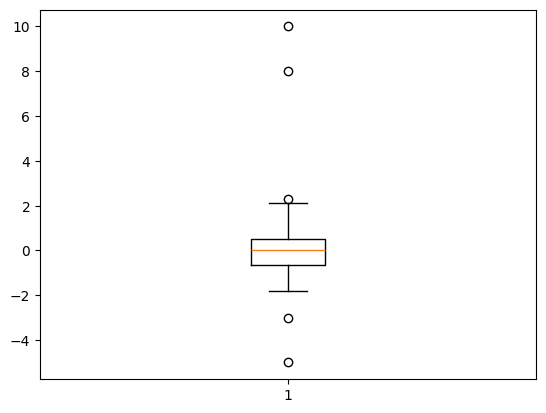

In [54]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

In [56]:
Q3, Q1 = np.percentile(data, [75 ,25])
IQR = Q3 - Q1
IQR
data[(Q1-1.5*IQR > data)|(Q3+1.5*IQR < data)] # IQR을 이용한 이상치 확인

array([ 2.31256634,  8.        , 10.        , -3.        , -5.        ])

In [63]:
# Q. 사분위 범위수를 이용해서 이상치를 찾는 outlier2() 함수를 구현해보세요.
def outlier2(df, col):
    Q3, Q1 = np.percentile(df[col], [75 ,25]) # percentile : 백분위수 계산
    IQR = Q3 - Q1
    return df[(Q1-1.5*IQR > df[col])|(Q3+1.5*IQR < df[col])]

outlier2(trade, '무역수지')

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항


# 📊 정규화 (Normalization)

trade 데이터를 보면 수입건수, 수출건수와 수입금액, 수출금액, 무역수지는 단위가 다르다는 것을 알 수 있습니다.

이처럼 컬럼마다 스케일이 크게 차이 나는 데이터를 입력하면 머신러닝 모델 학습에 문제가 발생할 수 있습니다.  
예를 들어 데이터의 범위가 0에서 1 사이인 컬럼 A와 10000에서 100000 사이인 컬럼 B가 있다고 생각해 봅시다.  
이런 데이터를 클러스터링한다고 가정해 봅시다. 데이터 간의 거리를 잴 때, 범위가 큰 컬럼 B의 값이
전체에 영향을 크게 미칠 것입니다.

다른 예시로 간단한 **선형 회귀(linear regression)**를 한다고 가정해봅시다.
모델의 파라미터를 업데이트하는 과정에서 범위가 큰 컬럼의 파라미터만 집중적으로 업데이트되는 문제가 생길 수 있습니다.
그래서 일반적으로 컬럼 간에 범위가 크게 다를 경우 전처리 과정에서 데이터를 정규화합니다.

정규화를 하는 방법은 다양하지만, 가장 잘 알려진 표준화(Standardization) 와
Min-Max Scaling을 알아보도록 하겠습니다.

🔹 Standardization
데이터의 평균은 0, 분산은 1로 변환합니다.

Standardization은 보통 평균이 0이고 표준편차가 1일 때 사용합니다.
그렇게 데이터가 **가우시안 분포(정규분포)**를 따를 경우 유용합니다.

$$
\frac{X - \mu}{\sigma}
$$


 
🔹 Min-Max Scaling
데이터의 최소값은 0, 최대값은 1로 변환합니다.

Min-Max Scaling은 피처의 범위가 다를 때 주로 사용하며, 확률 분포를 모를 때 유용합니다.

$$
\frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

In [79]:
# 정규분포를 따라 랜덤하게 데이터 x를 생성합니다. 
x = pd.DataFrame({'A': np.random.randn(100)*4+4,
                 'B': np.random.randn(100)-1})
x.head()

,A,B
0,0.576245,-0.529059
1,6.848282,-0.982567
2,8.060520,-2.780867
3,-3.611666,-2.064907
4,-1.730818,-0.343472


In [81]:
# 데이터 x를 Standardization 기법으로 정규화합니다.
x_standardization = (x - x.mean())/x.std()
x_standardization.head()

,A,B
0,-0.969805,0.577803
1,0.870850,0.084464
2,1.226605,-1.871779
3,-2.198831,-1.092937
4,-1.646858,0.779690


In [80]:
# 데이터 x를 min-max scaling 기법으로 정규화합니다. 
x_min_max = (x-x.min())/(x.max()-x.min())
x_min_max.head()

,A,B
0,0.272320,0.546298
1,0.680161,0.468028
2,0.758987,0.157663
3,0.000000,0.281229
4,0.122303,0.578328


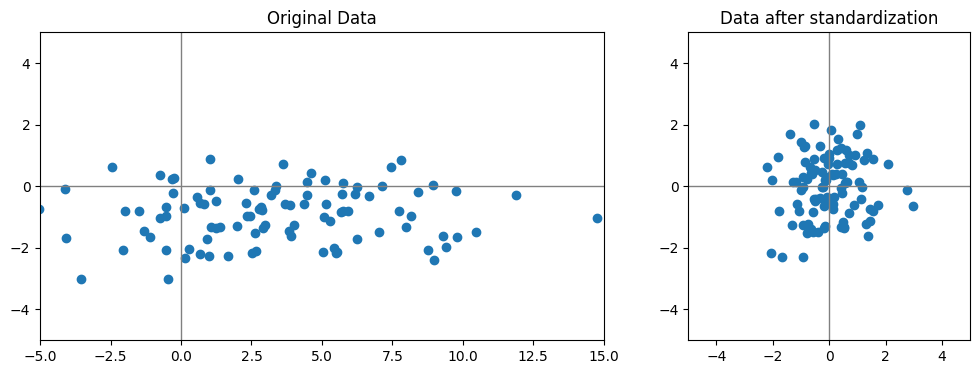

In [73]:
# Standardization과 Min-Max Scaling의 결과를 비교하기 위해 시각화합니다.
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_standardization['A'], x_standardization['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after standardization')

plt.show()

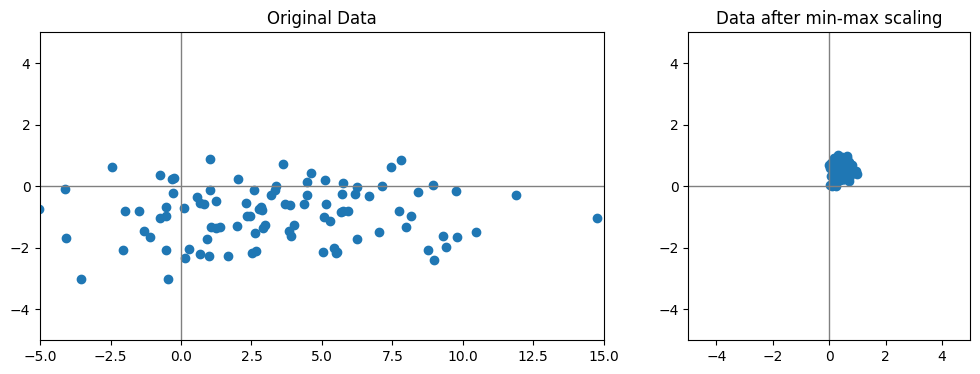

In [76]:
# Standardization과 Min-Max Scaling의 결과를 비교하기 위해 시각화합니다.
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_min_max['A'], x_min_max['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after min-max scaling')

plt.show()

#### trade 데이터를 이용한 `Standardization`
---

우선 정규화를 시켜야 할 수치형 컬럼들을 cols 변수에 담은 후, 데이터에서 평균을 빼고, 표준편차를 나눠주도록 한다.


In [78]:
# trade 데이터를 standardization 기법으로 정규화합니다. 
cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'] # 수치형 데이터를 cols 변수에 저장
trade_standardization = (trade[cols]-trade[cols].mean())/trade[cols].std() # 데이터에서 평균을 빼고 표준편차로 나누기
trade_standardization.head()
trade_standardization.describe() #describe : 기술통계량 요약

,수출건수,수출금액,수입건수,수입금액,무역수지
count,1.950000e+02,1.940000e+02,1.950000e+02,1.950000e+02,1.940000e+02
mean,-1.093143e-16,1.373472e-17,1.821904e-17,-5.465713e-17,-4.578239e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.194976e-01,-1.229458e+00,-9.984408e-01,-1.276341e+00,-1.599825e+00
25%,-5.937426e-01,-1.039747e+00,-7.673625e-01,-7.911669e-01,-1.115271e+00
50%,-4.373265e-01,-1.580816e-01,-3.429346e-01,-4.137392e-01,1.551808e-01
75%,4.420459e-01,1.034171e+00,3.927781e-01,8.827841e-01,7.452472e-01
max,5.486317e+00,2.072384e+00,3.239068e+00,2.376092e+00,2.427642e+00


#### trade 데이터를 이용한 `Min-Max Scaling`
---

우선 정규화를 시켜야 할 수치형 컬럼들을 cols 변수에 담은 후, 최솟값을 빼주고, 최댓값-최솟값으로 나눠준다.'

$$
\frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

In [101]:
# Q. trade 데이터를 min-max scaling 기법으로 정규화합니다.
trade_min_max_scaling = trade[cols]
trade_min_max_scaling = (trade[cols]-trade[cols].min())/(trade[cols].max()-trade[cols].min())
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320,NaN
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512,NaN
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310,NaN
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281,NaN
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660,NaN


우리는 실제로 해당 값에 대한 분포를 정확하게 모르기 때문에 standardization 보다 min-max scaling을 사용해 정규화하겠다.
Min-max scaling은 데이터의 최소값과 최대값을 기준으로 정규화하기 때문에 데이터의 분포를 알 필요가 없습니다. 반면, standardization은 평균과 표준편차를 사용하여 데이터를 변환하므로 데이터가 정규분포를 따를 때 더 효과적입니다. 데이터의 분포를 모를 경우, min-max scaling은 모든 값이 동일한 범위(0과 1 사이)에 있도록 보장하므로 더 안전한 선택이 될 수 있습니다.

In [85]:
trade.describe() #describe detail : 기술통계량 요약

,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
count,195.000000,194.000000,195.000000,195.000000,194.000000,0.0
mean,0.143541,0.372355,0.235620,0.349450,0.397229,NaN
std,0.156108,0.302861,0.235988,0.273790,0.248295,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.050853,0.057456,0.054532,0.132836,0.120312,NaN
50%,0.075271,0.324478,0.154691,0.236172,0.435759,NaN
75%,0.212548,0.685566,0.328311,0.591147,0.582270,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [91]:
# Q. train 데이터와 test 데이터에 정규화를 적용해봅시다.
# train 데이터와 test 데이터가 나눠져 있는 경우 train 데이터를 정규화시켰던 기준 그대로 test 데이터도 정규화시켜줘야 합니다.
# 이유: train 데이터의 분포를 기준으로 모델이 학습되기 때문에, test 데이터도 동일한 기준으로 정규화해야
# 모델이 일관된 입력 데이터를 받을 수 있습니다. 만약 test 데이터를 별도의 기준으로 정규화하면,
# train 데이터와 test 데이터의 분포가 달라져 모델의 성능이 저하될 수 있습니다.

train = pd.DataFrame([[10, -10], [30, 10], [50, 0]])
test = pd.DataFrame([[0, 1], [10, 10]])

train_min = train.min()
train_max = train.max()

# 중요한 점은, test 데이터에 min-max scaling을 적용할 때도
# train 데이터 기준으로 수행해야 한다는 것입니다. 이유가 무엇인가요?
# test 데이터의 min-max scaling은 train 데이터의 min, max 값으로 scaling합니다.

train_min_max = (train - train_min) / (train_max - train_min)
test_min_max =  (test - train_min) / (train_max - train_min)



(     0    1
 0  0.0  0.0
 1  0.5  1.0
 2  1.0  0.5,
       0     1
 0 -0.25  0.55
 1  0.00  1.00)

In [100]:
from sklearn.preprocessing import MinMaxScaler
train = [[10, -10], [30, 10], [50, 0]]
test = [[0, 1]]
scaler = MinMaxScaler()
print("👽 It's okay, no biggie.")

scaler.fit_transform(train)
scaler.transform(test)

👽 It's okay, no biggie.


array([[-0.25,  0.55]])

# N6_원-핫 인코딩(One - Hot Encoding)

이제 범주형 데이터인 국가명 컬럼을 다뤄보도록 하겠습니다.
머신러닝이나 딥러닝 프레임워크에서 범주형을 지원하지 않는 경우 원- 핫 인코딩을 해야한다. 

원-핫 인코딩이란 카테고리별 이진 특성을 만들어 해당하는 특성만 1, 나머지는 0으로 만드는 방법입니다. 
그럼 pandas로 국가명 컬럼을 원-핫 인코딩을 해보겠습니다.

In [102]:
#trade 데이터의 국가명 컬럼 원본
print(trade['국가명'].head())  

# get_dummies를 통해 국가명 원-핫 인코딩
country = pd.get_dummies(trade['국가명'])
country.head()

0    중국
1    미국
2    일본
3    중국
4    미국
Name: 국가명, dtype: object


,미국,일본,중국
0,False,False,True
1,True,False,False
2,False,True,False
3,False,False,True
4,True,False,False


In [103]:
trade = pd.concat([trade, country], axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항,미국,일본,중국
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320,NaN,False,False,True
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512,NaN,True,False,False
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310,NaN,False,True,False
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281,NaN,False,False,True
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660,NaN,True,False,False


In [104]:
trade.drop(['국가명'], axis=1, inplace=True)
trade.head()

,기간,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항,미국,일본,중국
0,2015년 01월,0.142372,0.794728,0.197014,0.700903,0.708320,NaN,False,False,True
1,2015년 01월,0.035939,0.295728,0.332972,0.085394,0.496512,NaN,True,False,False
2,2015년 01월,0.011187,0.042477,0.001249,0.112938,0.125310,NaN,False,True,False
3,2015년 02월,0.078351,0.629759,0.099597,0.542551,0.603281,NaN,False,False,True
4,2015년 02월,0.024131,0.254394,0.270146,0.000000,0.505660,NaN,True,False,False


# N7_구간화(Binning)

지금까지 trade 데이터를 다루면서 다양한 전처리 기법을 배웠습니다. 이제 다른 전처리 기법을 배워보도록 하겠습니다.

salary에 소득 데이터가 있다. 이 데이터를 구간별로 나누고자 하는데 이러한 기법을 구간화 (`Data binning` 혹은 `bucketing`)이라고 부릅니다.

👽 Almost there..


<Axes: >

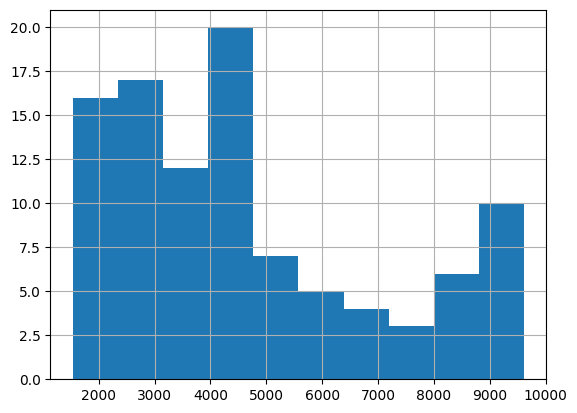

In [105]:
salary = pd.Series([4300, 8370, 1750, 3830, 1840, 4220, 3020, 2290, 4740, 4600, 
                    2860, 3400, 4800, 4470, 2440, 4530, 4850, 4850, 4760, 4500, 
                    4640, 3000, 1880, 4880, 2240, 4750, 2750, 2810, 3100, 4290, 
                    1540, 2870, 1780, 4670, 4150, 2010, 3580, 1610, 2930, 4300, 
                    2740, 1680, 3490, 4350, 1680, 6420, 8740, 8980, 9080, 3990, 
                    4960, 3700, 9600, 9330, 5600, 4100, 1770, 8280, 3120, 1950, 
                    4210, 2020, 3820, 3170, 6330, 2570, 6940, 8610, 5060, 6370,
                    9080, 3760, 8060, 2500, 4660, 1770, 9220, 3380, 2490, 3450, 
                    1960, 7210, 5810, 9450, 8910, 3470, 7350, 8410, 7520, 9610, 
                    5150, 2630, 5610, 2750, 7050, 3350, 9450, 7140, 4170, 3090])
print("👽 Almost there..")

# 이 데이터를 구간별로 나누고자 한다. 이러한 기법을 Data binning 혹은 buckeing)이라고 한다.

salary.hist() # 히스토그램으로 나타내기

In [106]:
# pandas의 `cut`과 `qcut` 함수를 사용하여 데이터를 구간별로 나눌 수 있습니다.

bins = [0, 2000, 4000, 6000, 8000, 10000] # 구간을 나누기 위한 기준값을 설정
ctg = pd.cut(salary, bins=bins) # cut 함수를 사용하여 범주형 데이터로 변환
ctg

0      (4000, 6000]
1     (8000, 10000]
2         (0, 2000]
3      (2000, 4000]
4         (0, 2000]
5      (4000, 6000]
6      (2000, 4000]
7      (2000, 4000]
8      (4000, 6000]
9      (4000, 6000]
10     (2000, 4000]
11     (2000, 4000]
12     (4000, 6000]
13     (4000, 6000]
14     (2000, 4000]
15     (4000, 6000]
16     (4000, 6000]
17     (4000, 6000]
18     (4000, 6000]
19     (4000, 6000]
20     (4000, 6000]
21     (2000, 4000]
22        (0, 2000]
23     (4000, 6000]
24     (2000, 4000]
25     (4000, 6000]
26     (2000, 4000]
27     (2000, 4000]
28     (2000, 4000]
29     (4000, 6000]
30        (0, 2000]
31     (2000, 4000]
32        (0, 2000]
33     (4000, 6000]
34     (4000, 6000]
35     (2000, 4000]
36     (2000, 4000]
37        (0, 2000]
38     (2000, 4000]
39     (4000, 6000]
40     (2000, 4000]
41        (0, 2000]
42     (2000, 4000]
43     (4000, 6000]
44        (0, 2000]
45     (6000, 8000]
46    (8000, 10000]
47    (8000, 10000]
48    (8000, 10000]
49     (2000, 4000]


In [107]:
print('salary[0]:', salary[0])
print('salary[0]가 속한 카테고리:', ctg[0])

salary[0]: 4300
salary[0]가 속한 카테고리: (4000, 6000]


In [108]:
ctg.value_counts().sort_index() # 범주별로 데이터 개수 확인

(0, 2000]        12
(2000, 4000]     34
(4000, 6000]     29
(6000, 8000]      9
(8000, 10000]    16
Name: count, dtype: int64

In [109]:
ctg = pd.cut(salary, bins=6)  # 6개의 구간으로 나누기
ctg

0      (4230.0, 5575.0]
1      (8265.0, 9610.0]
2     (1531.93, 2885.0]
3      (2885.0, 4230.0]
4     (1531.93, 2885.0]
5      (2885.0, 4230.0]
6      (2885.0, 4230.0]
7     (1531.93, 2885.0]
8      (4230.0, 5575.0]
9      (4230.0, 5575.0]
10    (1531.93, 2885.0]
11     (2885.0, 4230.0]
12     (4230.0, 5575.0]
13     (4230.0, 5575.0]
14    (1531.93, 2885.0]
15     (4230.0, 5575.0]
16     (4230.0, 5575.0]
17     (4230.0, 5575.0]
18     (4230.0, 5575.0]
19     (4230.0, 5575.0]
20     (4230.0, 5575.0]
21     (2885.0, 4230.0]
22    (1531.93, 2885.0]
23     (4230.0, 5575.0]
24    (1531.93, 2885.0]
25     (4230.0, 5575.0]
26    (1531.93, 2885.0]
27    (1531.93, 2885.0]
28     (2885.0, 4230.0]
29     (4230.0, 5575.0]
30    (1531.93, 2885.0]
31    (1531.93, 2885.0]
32    (1531.93, 2885.0]
33     (4230.0, 5575.0]
34     (2885.0, 4230.0]
35    (1531.93, 2885.0]
36     (2885.0, 4230.0]
37    (1531.93, 2885.0]
38     (2885.0, 4230.0]
39     (4230.0, 5575.0]
40    (1531.93, 2885.0]
41    (1531.93, 

In [110]:
ctg = pd.cut(salary, bins=6)  # 6개의 구간으로 나누기
ctg.value_counts().sort_index() # 범주별로 데이터 개수 확인

(1531.93, 2885.0]    27
(2885.0, 4230.0]     24
(4230.0, 5575.0]     21
(5575.0, 6920.0]      6
(6920.0, 8265.0]      7
(8265.0, 9610.0]     15
Name: count, dtype: int64

In [111]:
ctg = pd.qcut(salary, q=5)  # 5개의 구간으로 나누기
ctg

0       (3544.0, 4648.0]
1       (7068.0, 9610.0]
2     (1539.999, 2618.0]
3       (3544.0, 4648.0]
4     (1539.999, 2618.0]
5       (3544.0, 4648.0]
6       (2618.0, 3544.0]
7     (1539.999, 2618.0]
8       (4648.0, 7068.0]
9       (3544.0, 4648.0]
10      (2618.0, 3544.0]
11      (2618.0, 3544.0]
12      (4648.0, 7068.0]
13      (3544.0, 4648.0]
14    (1539.999, 2618.0]
15      (3544.0, 4648.0]
16      (4648.0, 7068.0]
17      (4648.0, 7068.0]
18      (4648.0, 7068.0]
19      (3544.0, 4648.0]
20      (3544.0, 4648.0]
21      (2618.0, 3544.0]
22    (1539.999, 2618.0]
23      (4648.0, 7068.0]
24    (1539.999, 2618.0]
25      (4648.0, 7068.0]
26      (2618.0, 3544.0]
27      (2618.0, 3544.0]
28      (2618.0, 3544.0]
29      (3544.0, 4648.0]
30    (1539.999, 2618.0]
31      (2618.0, 3544.0]
32    (1539.999, 2618.0]
33      (4648.0, 7068.0]
34      (3544.0, 4648.0]
35    (1539.999, 2618.0]
36      (3544.0, 4648.0]
37    (1539.999, 2618.0]
38      (2618.0, 3544.0]
39      (3544.0, 4648.0]


In [112]:
ctg = pd.qcut(salary, q=5)
ctg

0       (3544.0, 4648.0]
1       (7068.0, 9610.0]
2     (1539.999, 2618.0]
3       (3544.0, 4648.0]
4     (1539.999, 2618.0]
5       (3544.0, 4648.0]
6       (2618.0, 3544.0]
7     (1539.999, 2618.0]
8       (4648.0, 7068.0]
9       (3544.0, 4648.0]
10      (2618.0, 3544.0]
11      (2618.0, 3544.0]
12      (4648.0, 7068.0]
13      (3544.0, 4648.0]
14    (1539.999, 2618.0]
15      (3544.0, 4648.0]
16      (4648.0, 7068.0]
17      (4648.0, 7068.0]
18      (4648.0, 7068.0]
19      (3544.0, 4648.0]
20      (3544.0, 4648.0]
21      (2618.0, 3544.0]
22    (1539.999, 2618.0]
23      (4648.0, 7068.0]
24    (1539.999, 2618.0]
25      (4648.0, 7068.0]
26      (2618.0, 3544.0]
27      (2618.0, 3544.0]
28      (2618.0, 3544.0]
29      (3544.0, 4648.0]
30    (1539.999, 2618.0]
31      (2618.0, 3544.0]
32    (1539.999, 2618.0]
33      (4648.0, 7068.0]
34      (3544.0, 4648.0]
35    (1539.999, 2618.0]
36      (3544.0, 4648.0]
37    (1539.999, 2618.0]
38      (2618.0, 3544.0]
39      (3544.0, 4648.0]


In [113]:
print(ctg.value_counts().sort_index())
print(".\n.\n🛸 Well done!")

(1539.999, 2618.0]    20
(2618.0, 3544.0]      20
(3544.0, 4648.0]      20
(4648.0, 7068.0]      20
(7068.0, 9610.0]      20
Name: count, dtype: int64
.
.
🛸 Well done!
